In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=42)

In [4]:
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

In [5]:
y

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
       1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

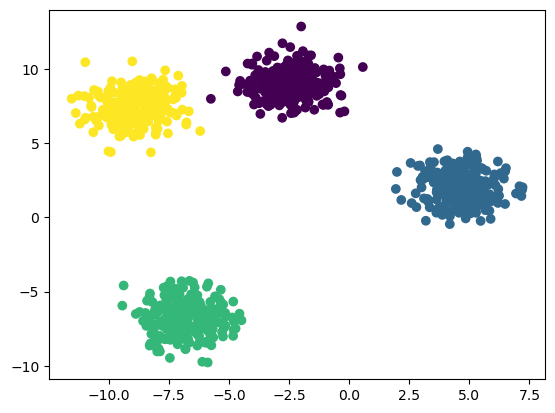

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
## standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)


In [9]:
from sklearn.cluster import KMeans

In [10]:
## by using elbow method we find the best k-value
dis=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train_sc)
    score=kmeans.inertia_
    dis.append(score)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [11]:
dis

[1400.000000000001,
 749.4733223081832,
 175.5713340976273,
 42.650260837640324,
 38.25116491655906,
 34.35980507003432,
 30.44815811243867,
 27.076243456775863,
 25.24623233676007,
 22.97799948539442]

Text(0, 0.5, 'sum of squared distance with respect to k')

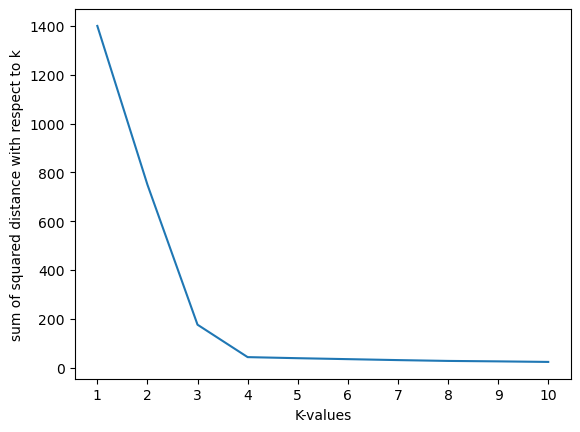

In [12]:
plt.plot(range(1,11),dis)
plt.xticks(range(1,11))
plt.xlabel("K-values")
plt.ylabel("sum of squared distance with respect to k")

In [13]:
## by seen that graph there are elbows comes at k=3 and k=4 so we check for both which k value best cluster the similar data points
kmeans=KMeans(n_clusters=3,init='k-means++') ## fit model with k=3 clusters
kmeans.fit(X_train)
y_pred1=kmeans.predict(X_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
y_pred1

array([2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2])

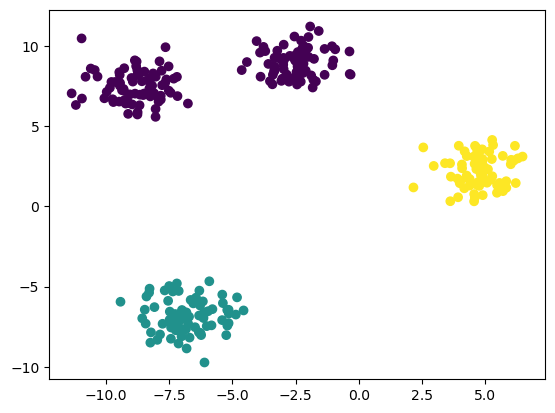

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred1) 

In [16]:
kmeans=KMeans(n_clusters=4,init='k-means++') ## fit model with k=4 clusters
kmeans.fit(X_train)
y_pred2=kmeans.predict(X_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


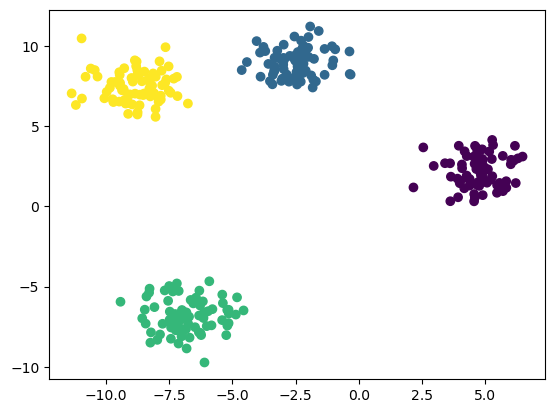

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred2)

In [18]:
## when elbow method does not exactly predict the k-value there are some more methods which validating the k-value
## kneelocator
## Silhoute Scoring

In [19]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [20]:
## kneelocator
from kneed import KneeLocator
knee=KneeLocator(range(1,11),dis,curve='convex',direction="decreasing")

In [21]:
knee.elbow

3

In [22]:
## Silhoute Scoring
from sklearn.metrics import silhouette_score

In [28]:
silhouette_dis=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X_train_sc)
    score=silhouette_score(X_train_sc,kmeans.labels_)
    silhouette_dis.append(score)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

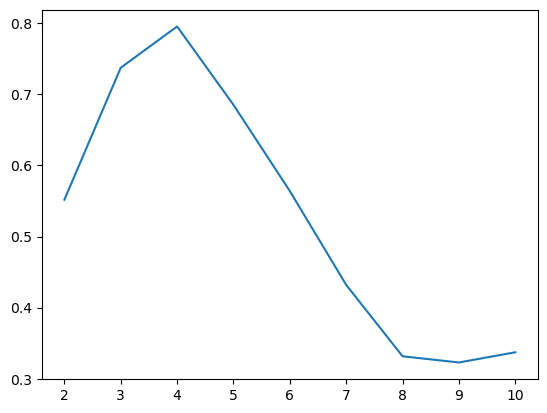

In [30]:
plt.plot(range(2,11),silhouette_dis) ## we take k-value at which graph at the highest peak